In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 모듈 불러오기
import pandas as pd
import ast

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 리뷰 파일 불러오기
reviews_df = pd.read_csv('/content/drive/MyDrive/Final/전처리/불용어_처리/spelled_bareun_final.csv')

In [ ]:
# 불용어 사전 불러오기
dic = pd.read_csv('/content/drive/MyDrive/sentiment_bareun_re.csv')

# 불용어 품사를 'NA'로 수정하기
dic.loc[dic['pos'].isnull(), 'pos'] = 'NA'

dic.head()

,Unnamed: 0,Tuple,Count,word,pos,label,sentiment_label_1,sentiment_label_2
0,2,좋/VA,25569,좋,VA,0,1,1
1,35,재밌/VA,7609,재밌,VA,0,1,1
2,43,잘/MAG,5263,잘,MAG,0,1,1
3,51,재미있/VA,4422,재미있,VA,0,1,1
4,57,쉽/VA,4083,쉽,VA,0,1,1


In [ ]:
# 불용어 튜플 제거 함수
def remove_stopwords(review):
    # 리뷰를 문자열로 받았다고 가정하고, 이를 리스트로 변환
    review_tuples = ast.literal_eval(review)
    # 불용어에 해당하지 않는 튜플만 남기기
    cleaned_review = [tup for tup in review_tuples if tup not in stopwords_tuples]
    return cleaned_review

In [ ]:
# 감성 분석을 위한 함수 정의 (word와 pos 모두 매칭)
def sentiment_analysis_from_clean_column(row, dic):
    sentiment_score = 0

    # 형태소 분석된 단어 리스트에서 단어와 품사를 추출
    for word, pos in row['stopwords_clean']:
        match = dic[(dic['word'] == word) & (dic['pos'] == pos)]
        if not match.empty:
            # 감성 사전에서 극성값 가져오기
            polarity = match.iloc[0]['sentiment_label_1']
            if polarity == 1 or polarity == -1:
                sentiment_score += polarity

    return sentiment_score

In [ ]:
# 리뷰 컬럼에서 불용어 제거
reviews_df['stopwords_clean'] = reviews_df['bareun_pos'].apply(remove_stopwords)

<ipython-input-14-6b2218476a35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentiment_score'] = test.apply(sentiment_analysis_from_clean_column, axis=1, dic=dic)
<ipython-input-14-6b2218476a35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_label'] = test['sentiment_score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


Accuracy: 0.7995975855130785
F1 Score: 0.8410211653350427
              precision    recall  f1-score   support

        -1.0       0.76      0.24      0.37       554
         0.0       0.07      0.95      0.13        60
         1.0       0.96      0.87      0.91      4356

    accuracy                           0.80      4970
   macro avg       0.60      0.69      0.47      4970
weighted avg       0.93      0.80      0.84      4970



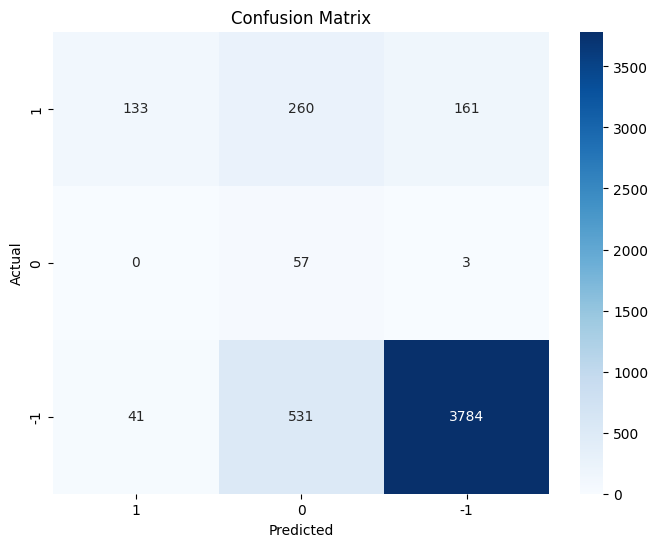

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 각 row에 대해 감성 분석 수행
test['sentiment_score'] = test.apply(sentiment_analysis_from_clean_column, axis=1, dic=dic)

# 감성 점수를 기반으로 예측 레이블 생성
# score가 양수면 1 (긍정), 0이면 중립, 음수면 -1 (부정)
test['predicted_label'] = test['sentiment_score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# 정확도 및 F1 스코어 계산
accuracy = accuracy_score(test['sentiment_label'], test['predicted_label'])
f1 = f1_score(test['sentiment_label'], test['predicted_label'], average='weighted')
cm = confusion_matrix(test['sentiment_label'], test['predicted_label'])

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(test['sentiment_label'], test['predicted_label']))

# 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0', '-1'],
            yticklabels=['1', '0', '-1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()